In [ ]:
install.packages("bnlearn")
library(bnlearn)

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(c("graph", "RBGL", "Rgraphviz"))
library(Rgraphviz)
install.packages("gRain", dependencies=TRUE)
library(gRain)
install.packages("useful")
library(useful)

### Wczytanie zbioru

In [253]:
breast <- foreign::read.arff('/content/dbreast-cancer.arff')
summary(breast)

    age       menopause   tumor_size  inv_nodes   node_caps deg_malig
 20-29: 1   ge40   :123   0-19 : 69   0-8  :260   no :221   1: 66    
 30-39:36   lt40   :  5   20-39:175   18-26:  1   yes: 56   2:129    
 40-49:89   premeno:149   40-54: 33   9-17 : 16             3: 82    
 50-59:91                                                            
 60-69:55                                                            
 70-79: 5                                                            
   breast       breast_quad  irradiat                   Class    
 left :145   central  : 21   no :215   no-recurrence-events:196  
 right:132   left_low :106   yes: 62   recurrence-events   : 81  
             left_up  : 94                                       
             right_low: 23                                       
             right_up : 33                                       
                                                                 

#### 277 pacjentek w tym 196 z nawrotami oraz 81 bez nawrotów.

In [21]:
str(breast)

'data.frame':	277 obs. of  10 variables:
 $ age        : Factor w/ 6 levels "20-29","30-39",..: 3 4 4 3 3 4 4 3 3 3 ...
 $ menopause  : Factor w/ 3 levels "ge40","lt40",..: 3 1 1 3 3 3 1 3 3 1 ...
 $ tumor_size : Factor w/ 3 levels "0-19","20-39",..: 1 1 2 2 2 2 3 1 1 3 ...
 $ inv_nodes  : Factor w/ 3 levels "0-8","18-26",..: 1 1 1 1 1 1 1 1 1 3 ...
 $ node_caps  : Factor w/ 2 levels "no","yes": 2 1 1 2 2 1 1 1 1 2 ...
 $ deg_malig  : Factor w/ 3 levels "1","2","3": 3 1 2 3 2 2 3 2 2 2 ...
 $ breast     : Factor w/ 2 levels "left","right": 2 2 1 2 1 2 1 1 2 2 ...
 $ breast_quad: Factor w/ 5 levels "central","left_low",..: 3 1 2 2 5 3 3 3 4 3 ...
 $ irradiat   : Factor w/ 2 levels "no","yes": 1 1 1 2 1 2 1 1 1 2 ...
 $ Class      : Factor w/ 2 levels "no-recurrence-events",..: 2 1 2 1 2 1 1 1 1 1 ...


In [22]:
anyNA(breast)

[1] FALSE

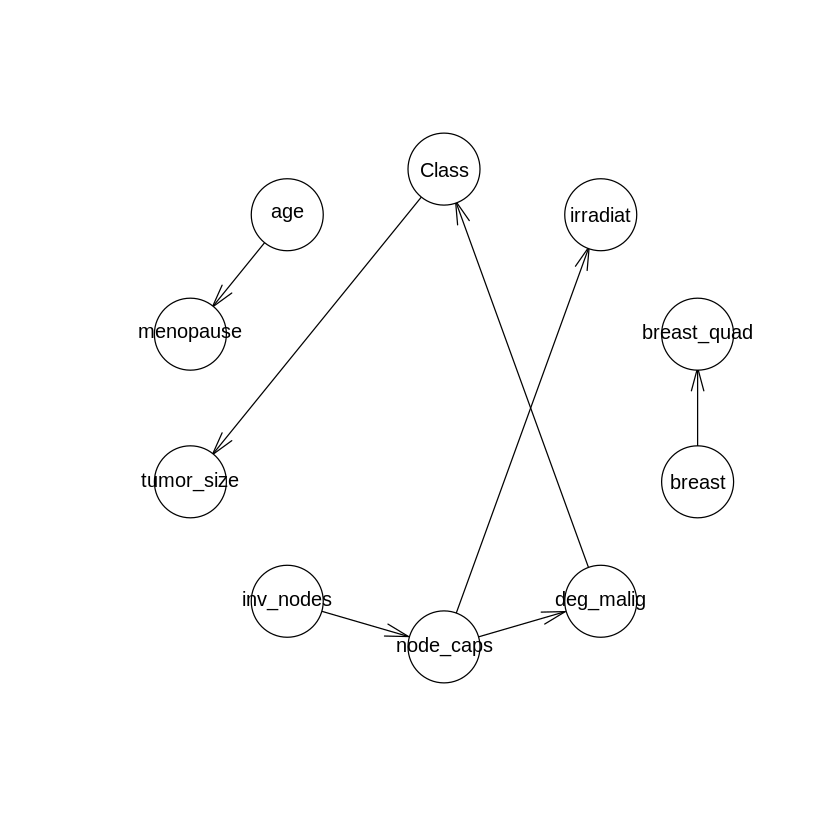

In [69]:
hc.breast <- hc(breast, score = "bic")
plot(hc.breast)

Odczytując przedstawiony graf można dostrzec iż:
- wiek wpływa na menopauzę
- rozmiar guzu zależy od tego czy guz jest nawracający czy nie
- w zależności czy węzły chłonne są zajęte czy nie może wystąpić perforowana torebka węzła chłonnego
- przy obecności perferowanej torebki guza można określić stopień złośliwości guza


Trzy niezależne zdarzenia: prawa czy lewa pierś, wiek oraz zajęte węzły chłonne.

In [29]:
dsep(hc.breast, "breast", "age", "inv_nodes")

[1] TRUE

Dla wyznaczenia prawdopodobieństwa stanu nawracjającego bądź nie potrzebne są następujące węzłe:
- zajęte węzły chłonne (inv_nodes)
- perferowana torebka węzła chłonnego (node_caps)
- stopień złośliwości guza (deg_malig)

Prawdopodobieństwo że pacientka jest w określonym wieku:

In [51]:
table(breast$age) / sum(table(breast$age))


      20-29       30-39       40-49       50-59       60-69       70-79 
0.003610108 0.129963899 0.321299639 0.328519856 0.198555957 0.018050542 

Prawdopodobieństwo że pacjentka ma menopauzę:

In [52]:
table(breast$menopause) / sum(table(breast$menopause))


      ge40       lt40    premeno 
0.44404332 0.01805054 0.53790614 

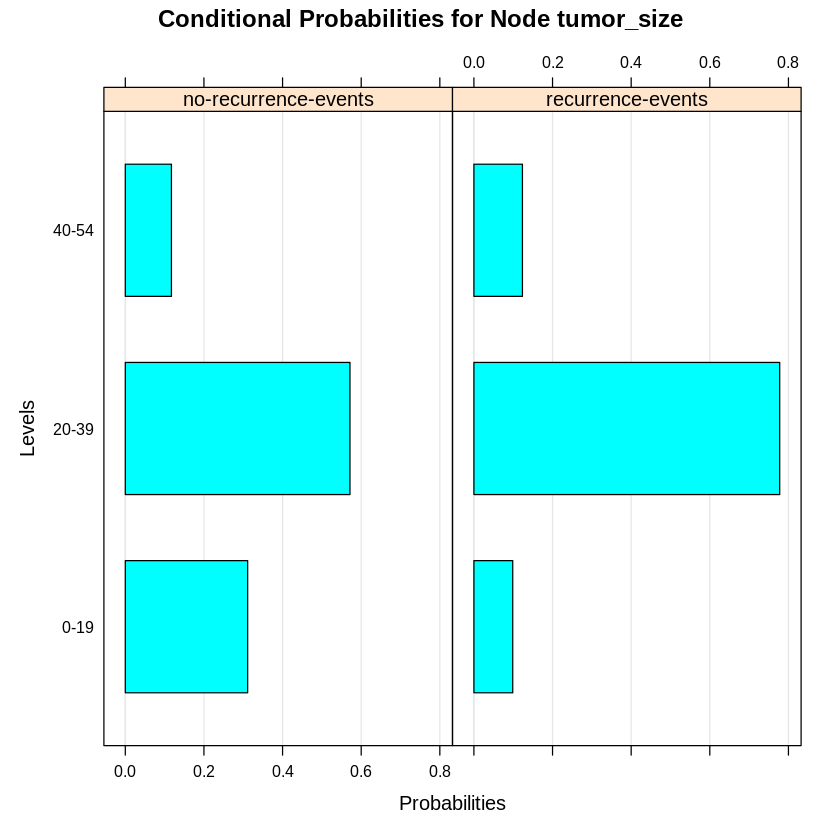

In [58]:
breast.bn.fit <- bn.fit(hc.breast, breast)
bn.fit.barchart(breast.bn.fit$tumor_size)

## Porównanie wybranych mierników sukcesu z użyciem algorytmu HC

In [ ]:
hc.breast.aic <- hc(breast, score = "aic")
hc.breast.bic <- hc(breast, score = "bic")
hc.breast.loglik <- hc(breast, score = "loglik")
hc.breast.bde <- hc(breast, score = "bde")
hc.breast.k2 <- hc(breast, score = "k2")

#### Wizualizacja struktur

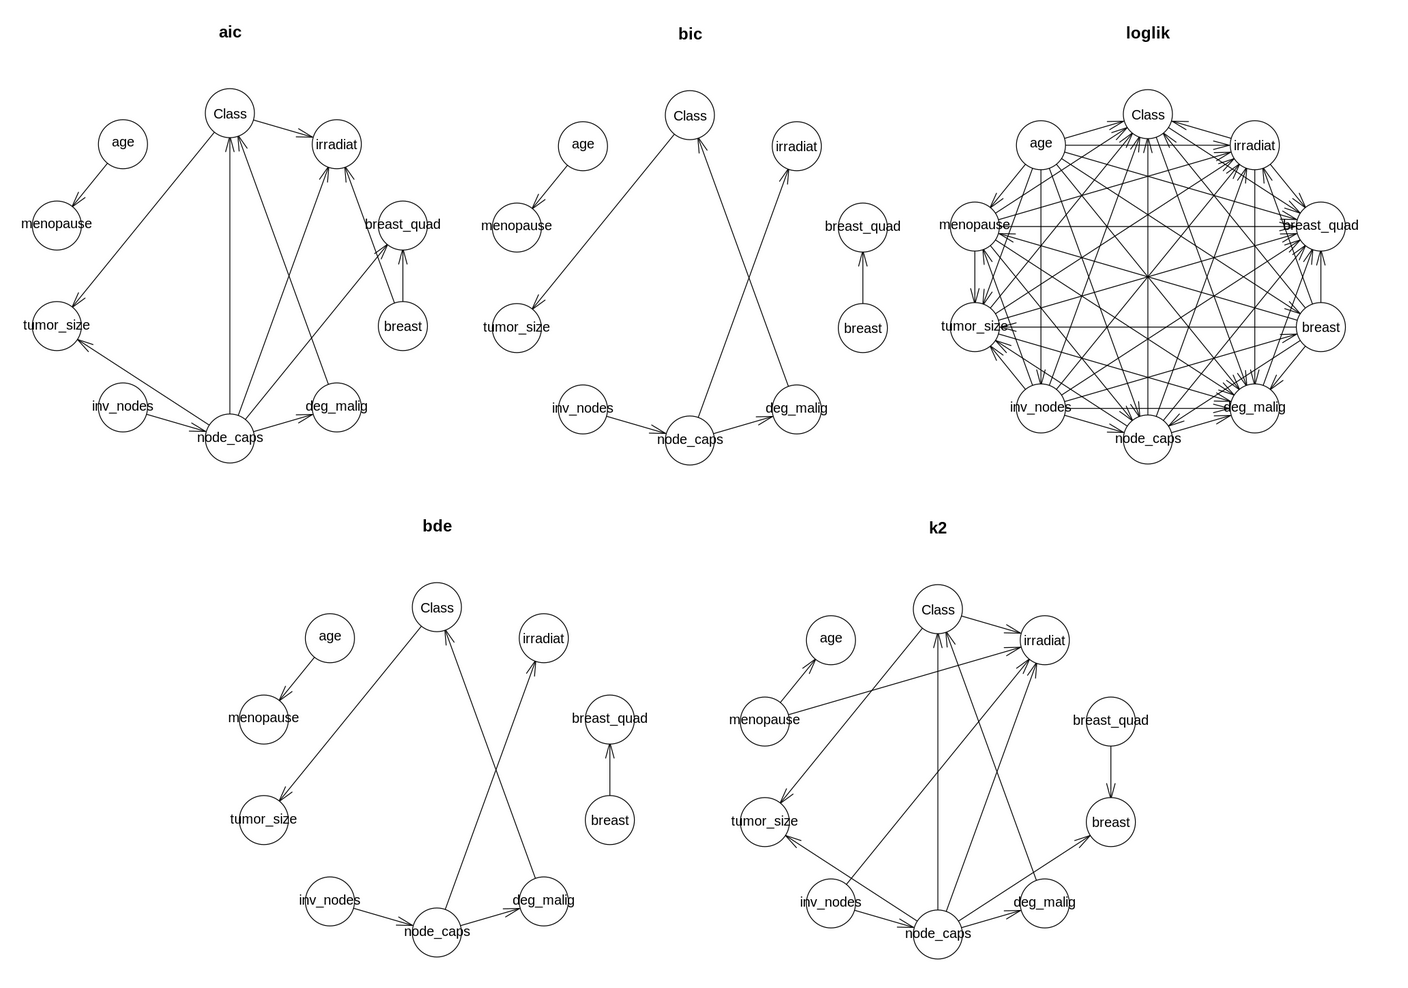

#### Schematy sieci

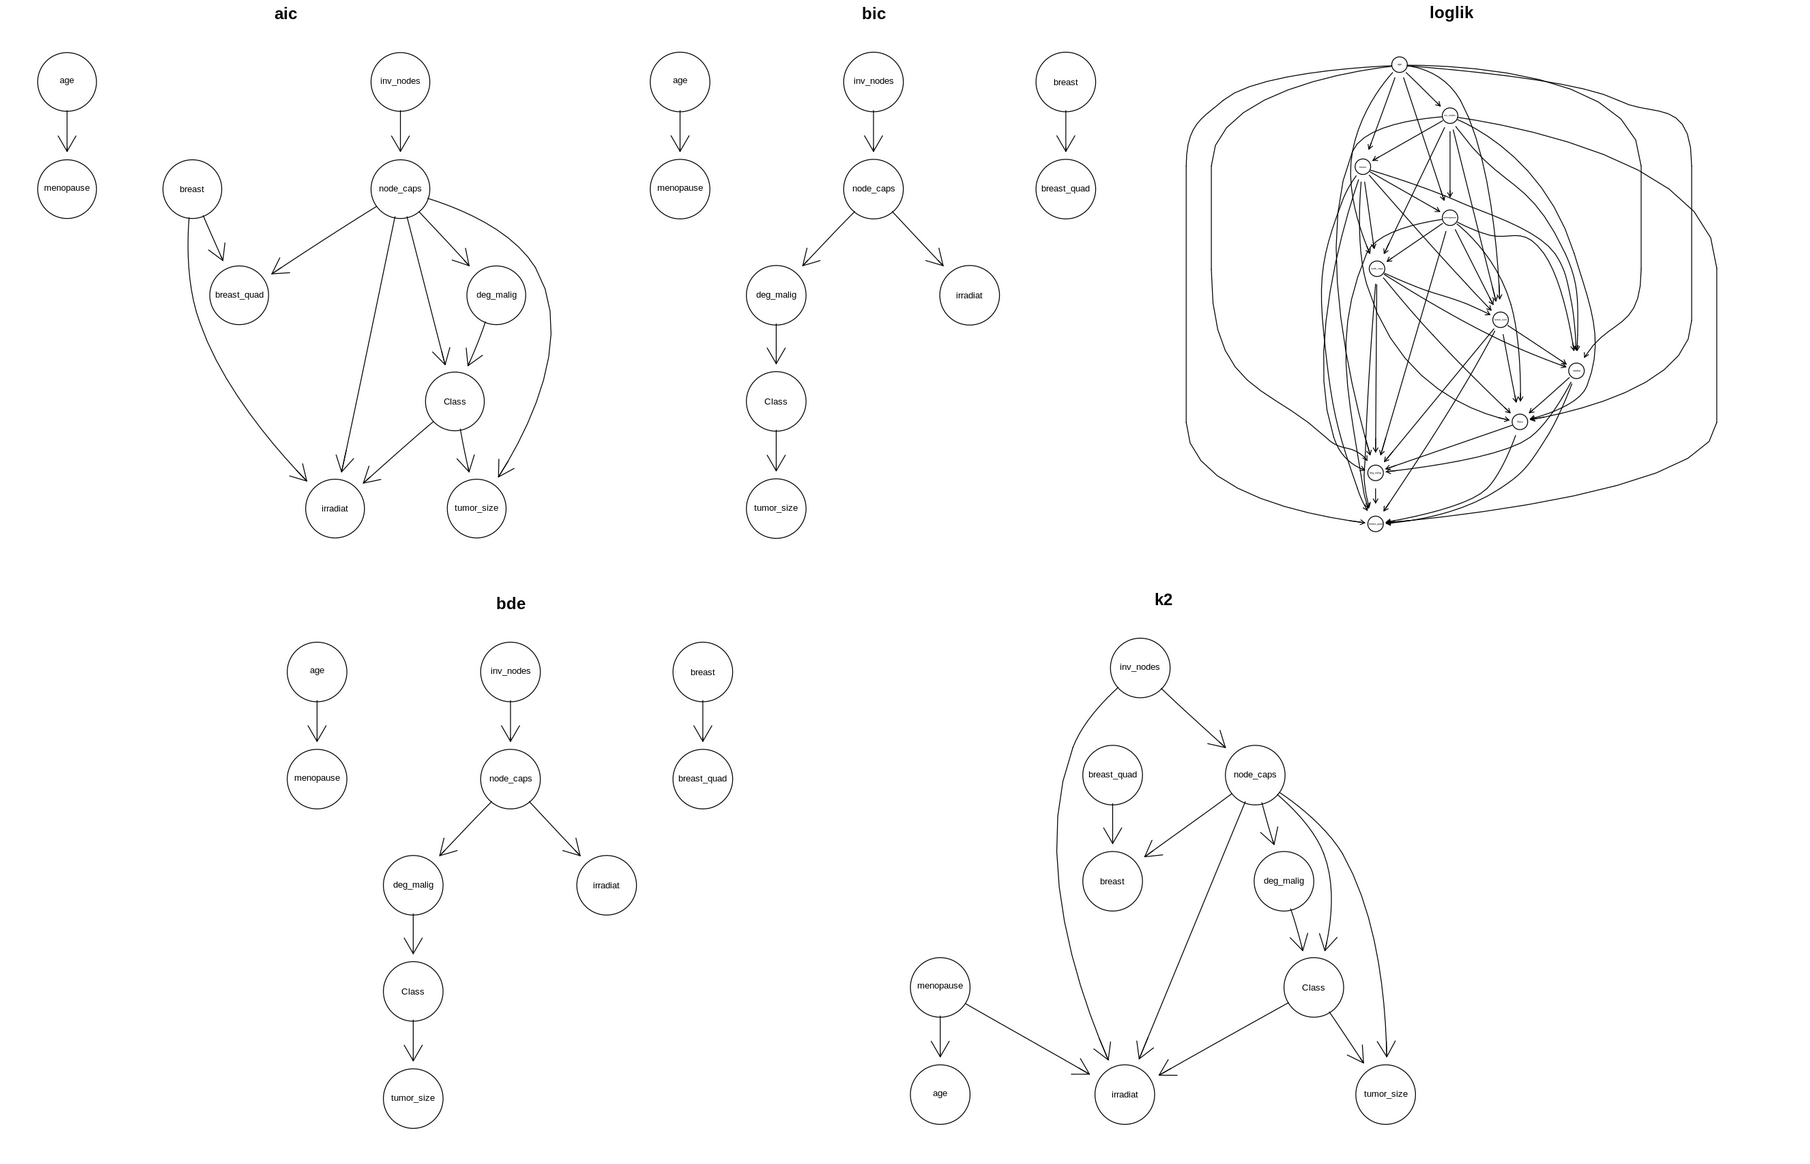

#### Score

In [194]:
print(paste("aic : ", score(hc.breast.aic, breast)))
print(paste("bic : ", score(hc.breast.bic, breast)))
print(paste("loglik : ", score(hc.breast.loglik, breast)))
print(paste("bde : ", score(hc.breast.bde, breast)))
print(paste("k2 : ", score(hc.breast.k2, breast)))

[1] "Score"
[1] "aic :  -2196.98652680396"
[1] "bic :  -2168.59357955148"
[1] "loglik :  -110825.623805001"
[1] "bde :  -2168.59357955148"
[1] "k2 :  -2258.42187441426"


#### Liczba parametrów

In [195]:
print(paste("aic : ", nparams(hc.breast.aic, breast)))
print(paste("bic : ", nparams(hc.breast.bic, breast)))
print(paste("loglik : ", nparams(hc.breast.loglik, breast)))
print(paste("bde : ", nparams(hc.breast.bde, breast)))
print(paste("k2 : ", nparams(hc.breast.k2, breast)))

[1] "Number of parameters"
[1] "aic :  65"
[1] "bic :  44"
[1] "loglik :  38879"
[1] "bde :  44"
[1] "k2 :  90"


#### Podsumowania dla sieci z parametrem "bic" oraz "loglik":

In [234]:
hc.breast.bic


  Bayesian network learned via Score-based methods

  model:
   [age][inv_nodes][breast][menopause|age][node_caps|inv_nodes]
   [breast_quad|breast][deg_malig|node_caps][irradiat|node_caps]
   [Class|deg_malig][tumor_size|Class]
  nodes:                                 10 
  arcs:                                  7 
    undirected arcs:                     0 
    directed arcs:                       7 
  average markov blanket size:           1.40 
  average neighbourhood size:            1.40 
  average branching factor:              0.70 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              2.812009 
  tests used in the learning procedure:  108 
  optimized:                             TRUE 


In [239]:
hc.breast.loglik


  Bayesian network learned via Score-based methods

  model:
   [age][inv_nodes|age][breast|age:inv_nodes][menopause|age:inv_nodes:breast]
   [node_caps|age:menopause:inv_nodes:breast]
   [tumor_size|age:menopause:inv_nodes:node_caps:breast]
   [irradiat|age:menopause:tumor_size:inv_nodes:node_caps:breast]
   [Class|age:menopause:tumor_size:inv_nodes:node_caps:breast:irradiat]
   [deg_malig|age:menopause:tumor_size:inv_nodes:node_caps:breast:irradiat:Class]
   [breast_quad|age:menopause:tumor_size:inv_nodes:node_caps:deg_malig:breast:irradiat:Class]
  nodes:                                 10 
  arcs:                                  45 
    undirected arcs:                     0 
    directed arcs:                       45 
  average markov blanket size:           9.00 
  average neighbourhood size:            9.00 
  average branching factor:              4.50 

  learning algorithm:                    Hill-Climbing 
  score:                                 Log-Likelihood (disc.) 
 

#### Liczba różnic pomiędzy strukturami

In [228]:
idx <- c("aic", "bic", "loglik", "bde", "k2")
aic <- c(0, hamming(hc.breast.aic, hc.breast.bic), hamming(hc.breast.aic, hc.breast.loglik), hamming(hc.breast.aic, hc.breast.bde), hamming(hc.breast.aic, hc.breast.k2))
bic <- c(hamming(hc.breast.aic, hc.breast.bic), 0, hamming(hc.breast.bic, hc.breast.loglik), hamming(hc.breast.bic, hc.breast.bde), hamming(hc.breast.bic, hc.breast.k2))
loglik <- c(hamming(hc.breast.aic, hc.breast.loglik), hamming(hc.breast.bic, hc.breast.loglik), 0, hamming(hc.breast.loglik, hc.breast.bde), hamming(hc.breast.loglik, hc.breast.k2))
bde <- c(hamming(hc.breast.aic, hc.breast.bde), hamming(hc.breast.bic, hc.breast.bde), hamming(hc.breast.loglik, hc.breast.bde), 0, hamming(hc.breast.bde, hc.breast.k2))
k2 <- c(hamming(hc.breast.aic, hc.breast.k2), hamming(hc.breast.bic, hc.breast.k2), hamming(hc.breast.k2, hc.breast.loglik), hamming(hc.breast.bde, hc.breast.k2), 0)

df <- data.frame(idx, aic, bic, loglik, bde, k2)
df

idx,aic,bic,loglik,bde,k2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aic,0,5,33,5,5
bic,5,0,38,0,6
loglik,33,38,0,38,32
bde,5,0,38,0,6
k2,5,6,32,6,0


### Wnioski:
- Sieci z paramenterm bic oraz bde są mają układy zbieżne, reszta rozbieżne.
- Przy paremetrze loglik węzły mają większą ilość potomków, większą ilość sąsiedzi oraz więcej przeprowadzono testów pod czas procedury uczenia. Taka sieć jest najbardziej złożona ze wszystkich.
- Nie dostrzeżono różnic w sieciach przy użyciu parametrów bic oraz bde. Te sieci były najmniej złożone.

## Porównanie różnych algorytmów przeszukiwania

In [285]:
hc.breast <- hc(breast)

set.seed(100)
hc.breast.restart <- hc(breast, restart = 1000, perturb = 10)

gs.breast <- gs(x = breast)
gs.breast <- cextend(gs.breast)

hiton.breast <- si.hiton.pc(breast)

#### Wizualizacja struktur

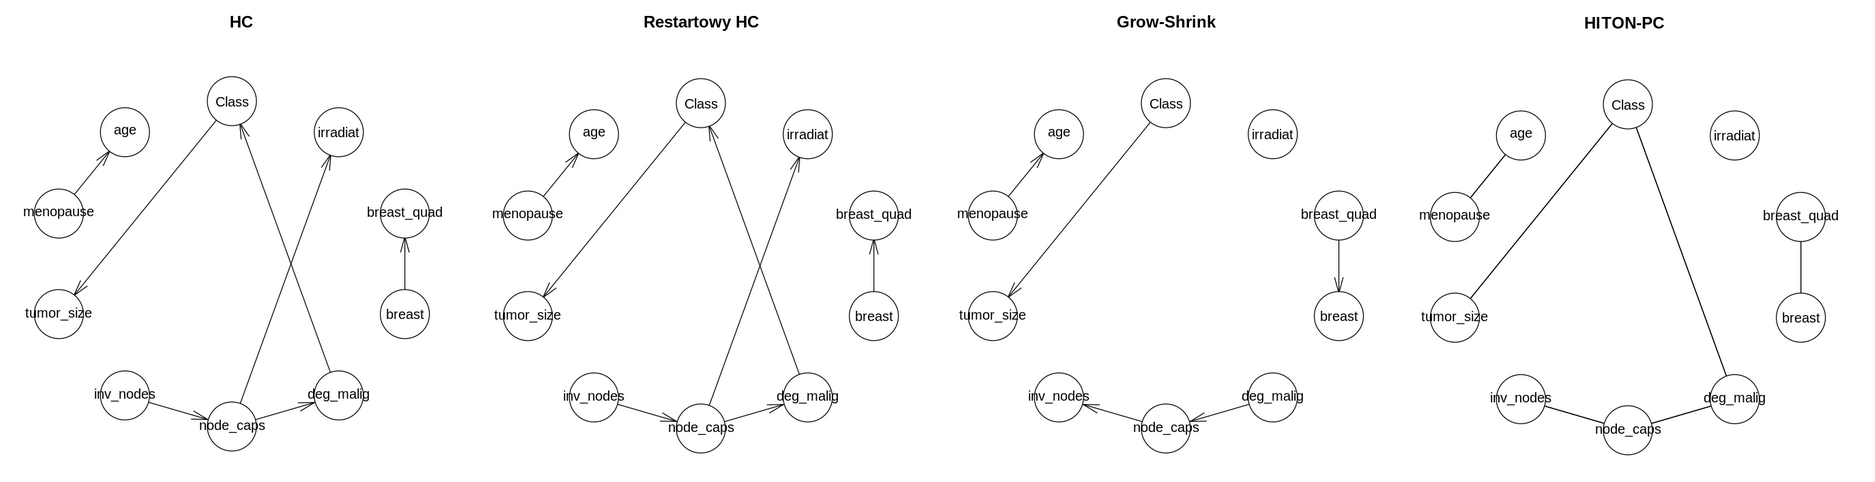

#### Schematy sieci

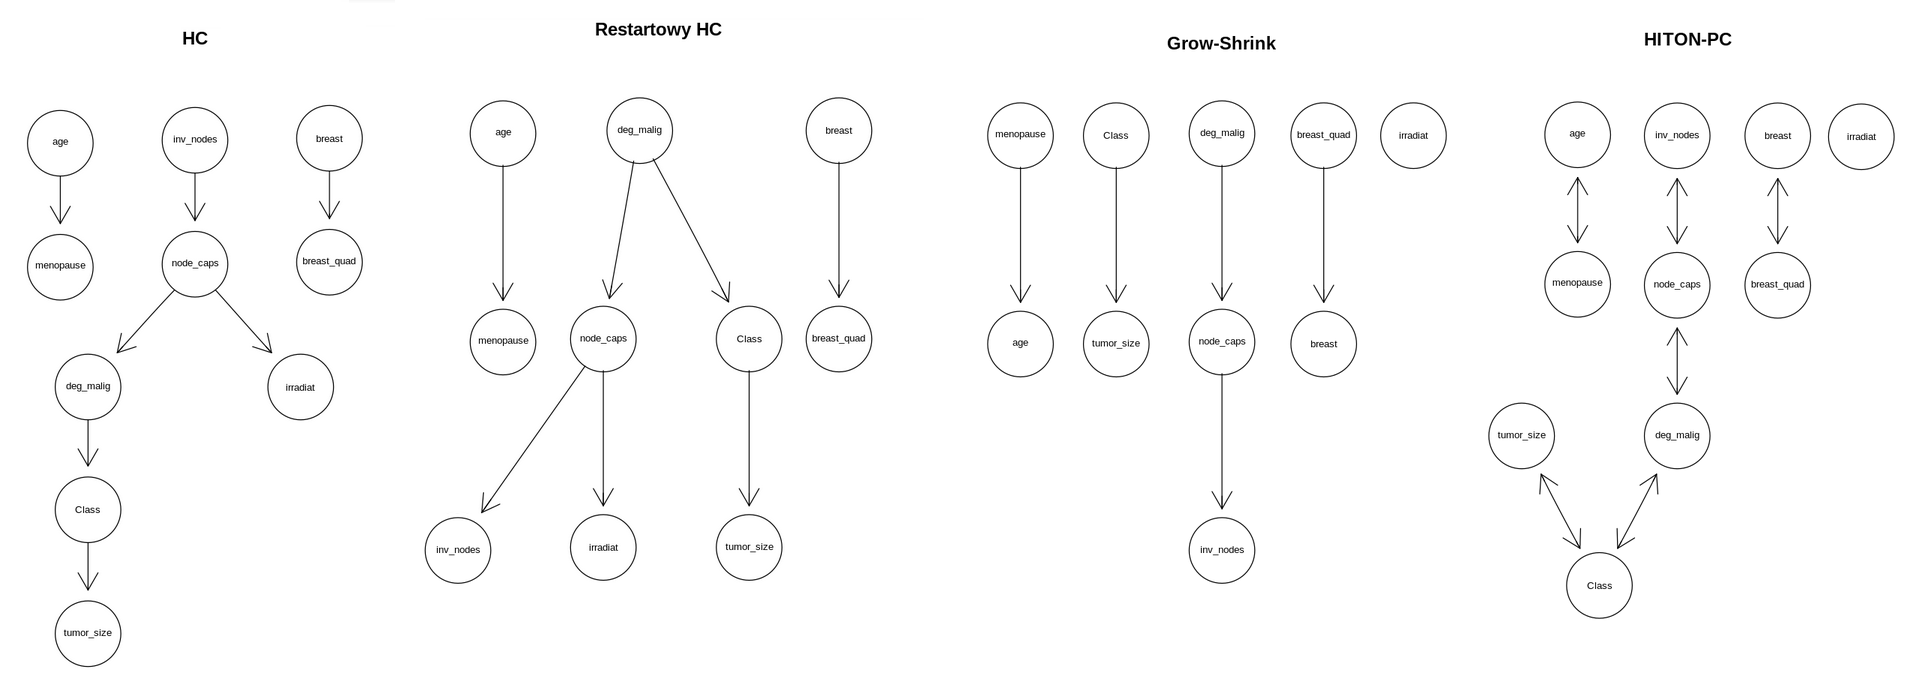

#### Score

In [286]:
print(paste("HC", score(hc.breast, breast)))
print(paste("Restartowy HC", BIC(hc.breast.restart, breast)))
print(paste("Grow-Shrink", score(gs.breast, breast, type="bic")))

[1] "HC -2168.59357955148"
[1] "Restartowy HC -2168.59357955148"
[1] "Grow-Shrink -2190.74272760247"


#### Liczba parametrów

In [288]:
print(paste("HC : ", nparams(hc.breast, breast)))
print(paste("Restartowy HC : ", nparams(hc.breast.restart, breast)))
print(paste("Grow-Shrink : ", nparams(gs.breast, breast)))

[1] "HC :  44"
[1] "Restartowy HC :  44"
[1] "Grow-Shrink :  41"


#### Podsumowania dla sieci":

In [291]:
hc.breast


  Bayesian network learned via Score-based methods

  model:
   [age][inv_nodes][breast][menopause|age][node_caps|inv_nodes]
   [breast_quad|breast][deg_malig|node_caps][irradiat|node_caps]
   [Class|deg_malig][tumor_size|Class]
  nodes:                                 10 
  arcs:                                  7 
    undirected arcs:                     0 
    directed arcs:                       7 
  average markov blanket size:           1.40 
  average neighbourhood size:            1.40 
  average branching factor:              0.70 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              2.812009 
  tests used in the learning procedure:  108 
  optimized:                             TRUE 


In [292]:
hc.breast.restart


  Bayesian network learned via Score-based methods

  model:
   [menopause][inv_nodes][breast][age|menopause][node_caps|inv_nodes]
   [breast_quad|breast][deg_malig|node_caps][irradiat|node_caps]
   [Class|deg_malig][tumor_size|Class]
  nodes:                                 10 
  arcs:                                  7 
    undirected arcs:                     0 
    directed arcs:                       7 
  average markov blanket size:           1.40 
  average neighbourhood size:            1.40 
  average branching factor:              0.70 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              2.812009 
  tests used in the learning procedure:  115358 
  optimized:                             TRUE 


In [293]:
gs.breast


  Bayesian network learned via Constraint-based methods

  model:
   [menopause][deg_malig][breast_quad][irradiat][Class][age|menopause]
   [tumor_size|Class][node_caps|deg_malig][breast|breast_quad]
   [inv_nodes|node_caps]
  nodes:                                 10 
  arcs:                                  5 
    undirected arcs:                     0 
    directed arcs:                       5 
  average markov blanket size:           1.00 
  average neighbourhood size:            1.00 
  average branching factor:              0.50 

  learning algorithm:                    Grow-Shrink 
  conditional independence test:         Mutual Information (disc.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  174 


In [289]:
hiton.breast


  Bayesian network learned via Constraint-based methods

  model:
    [undirected graph]
  nodes:                                 10 
  arcs:                                  6 
    undirected arcs:                     6 
    directed arcs:                       0 
  average markov blanket size:           1.20 
  average neighbourhood size:            1.20 
  average branching factor:              0.00 

  learning algorithm:                    Semi-Interleaved HITON-PC 
  conditional independence test:         Mutual Information (disc.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  142 


#### Liczba różnic pomiędzy strukturami

In [295]:
idx <- c("HC", "Restartowy HC", "Grow-Shrink", "HITON-PC")
hc <- c(0, hamming(hc.breast, hc.breast.restart), hamming(hc.breast, gs.breast), hamming(hc.breast, hiton.breast))
rhc <- c(hamming(hc.breast, hc.breast.restart), 0, hamming(hc.breast.restart, gs.breast), hamming(hc.breast.restart, hiton.breast))
gs <- c(hamming(hc.breast, gs.breast), hamming(hc.breast.restart, gs.breast), 0, hamming(gs.breast, hiton.breast))
hiton <- c(hamming(hc.breast, hiton.breast), hamming(hc.breast.restart, hiton.breast), hamming(hiton.breast, gs.breast), 0)
df <- data.frame(idx, hc, rhc, gs, hiton)
df

idx,hc,rhc,gs,hiton
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
HC,0,0,2,1
Restartowy HC,0,0,2,1
Grow-Shrink,2,2,0,1
HITON-PC,1,1,1,0


### Wnioski:
- Najbardziej złożona struktura uzyskana jest za pomocą algorytmu HC oraz RHC.
- HC oraz RHC mają jednakową strukturę, ale na każdym z nich przeprowadzono różną liczbę testów pod czas procedury uczenia. 
- Najprostszą strukturę uzyskano z użyciem Grow-Shrink, 